## <span style="color: green;">**``Predicting Cleaning Service Time and Pricing Using Machine Learning``**<green>

## <span style="color: green;">**Dataset Creation Process**</green>

To generate the dataset, we utilized existing Excel data and applied specific multiplier factors and time-based features to enhance its accuracy and relevance. A business formula was developed to estimate the required shift hours for a cleaner based on key factors such as bedrooms, bathrooms, job type, and additional cleaning requirements.

Additionally, we implemented a **rule-based approach** to support and complement the machine learning models, ensuring that the predictions align with real-world business needs and operational constraints.

Below are several machine learning models that are suitable for our problem. We will implement and evaluate each of them to identify the most effective model for predicting cleaning service time and pricing based on the given dataset.

###  Regression Models for Cleaning Time & Price Prediction

| **Regression Model** | **Concept** | **Pros** | **Cons** |
|----------------------|------------|----------|----------|
| **Linear Regression** | Assumes a linear relationship between input features and target variables. Uses the equation: 𝑦 = 𝑏₀ + 𝑏₁𝑥₁ + ... + 𝑏ₙ𝑥ₙ | - Simple and interpretable model <br> - Computationally efficient <br> - Works well for linearly distributed data | - Fails for non-linear relationships <br> - Sensitive to outliers <br> - Assumes feature independencn data |
| **Random Forest Regression** | Uses multiple decision trees (ensemble method) and averages their predictions to improve accuracy | - Handles missing data and non-linearity well <br> - Reduces overfitting compared to decision trees | - Computationally expensive <br> - Less interpretable than simple models |
| **Gradient Boosting Regression (XGBoost)** | Boosting technique that builds models sequentially, correcting errors of the previous model | - High accuracy <br> - Handles complex relationships <br> - Feature importance analysis | - Sensitive to hyperparameter tuning <br> - Computationally inselection |


## <span style="color: green;">**Business Logic and Rule-Based Function Implementation**<green>

### <u>To understand business rules</u>


**per hour price**-35$

**multipliers for features** 

                             -  rooms 
                             - Bath rooms
                             - Job type
                             - House Type



**Creating Pricing Formula**

#### <span style="color: orange;">**Total Time**= **Basetime(bedroom +bathroom)**</span>
  
  #### <span style="color: orange;">**New Total time** =**total time** * **job_multiplier** * **house_multiplier**
  
  #### <span style="color: orange;">**price = New Total time * Hourly rate**
  
  **note**:The minimum hourly hours is 2.5 hours for all cleans. Regardless, if it’s a standard or deep cleaning.

Please set separate variables for economy, standard, and premium cleaning.

The rate for economy $27 per hour, 

the rate for standard $30 per hour

the rate for premium be $37 an hour



Lastly, for the ranges:

Please round up to the closest 30 minutes, for example 

2.66hrs would be 2.5-3hrs

3hrs would be 3-3.5hrs

4.5hrs would be 4.5-5hrs


## <span style="color: green;">**Rule-Based Cleaning Time and Price Calculation**

In [129]:
# Define mappings for bedrooms, bathrooms, and square footage
bedroom_hours = {
    0: 0.5, 0.5: 0.5, 1: 0.5, 1.5: 0.75, 2: 1, 2.5: 1.25,
    3: 1.5, 3.5: 1.75, 4: 2, 4.5: 2.25, 5: 2.5, 5.5: 2.75,
    6: 3, 6.5: 3.25, 7: 3.5, 7.5: 3.75, 8: 4, 8.5: 4.25,
    9: 4.5, 9.5: 4.75, 10: 5, 10.5: 5.25, 11: 5.5, 11.5: 5.75,
    12: 6, 12.5: 6.25, 13: 6.5, 13.5: 6.75, 14: 7, 14.5: 7.25,
    15: 7.5, 15.5: 7.75, 16: 8, 16.5: 8.25, 17: 8.5, 17.5: 8.75,
    18: 9, 18.5: 9.25, 19: 9.5, 19.5: 9.75, 20: 10, 20.5: 10.25,
    21: 10.5
}

bathroom_hours = {
    1: 0.5, 1.5: 0.75, 2: 1, 2.5: 1.25, 3: 1.5, 3.5: 1.75,
    4: 2, 4.5: 2.25, 5: 2.5, 5.5: 2.75, 6: 3, 6.5: 3.25,
    7: 3.5, 7.5: 3.75, 8: 4, 8.5: 4.25, 9: 4.5, 9.5: 4.75,
    10: 5, 10.5: 5.25, 11: 5.5, 11.5: 5.75, 12: 6}


# Define multipliers for different job types
job_type_multipliers = {
    "standard_clean": 1,
    "deep_clean": 1.8,
   
}# Define multipliers for house types
house_type_multipliers = {
    "Condo/Townhouse": 1,
    "Detached": 1.3
}



# Function to calculate total cleaning price with house and job type multipliers
def calculate_cleaning_price_with_house_type(
    bedrooms, bathrooms,  job_type, house_type, hourly_rate=35
):
    # Lookup hours for bedrooms and bathrooms
    bedroom_time = bedroom_hours.get(bedrooms, 0)  # Default to 0 if not found
    bathroom_time = bathroom_hours.get(bathrooms, 0)  # Default to 0 if not found
    
   
    
    # Total time
    total_time = bedroom_time + bathroom_time 
    
    # Lookup multipliers for job type and house type
    job_multiplier = job_type_multipliers.get(job_type, 1)  # Default to 1 if not found
    house_multiplier = house_type_multipliers.get(house_type, 1)  # Default to 1 if not found
    
    # Apply both multipliers to total time and calculate price
    adjusted_time = round(total_time * job_multiplier * house_multiplier,2)
    
    # Enforce minimum cleaning time of 2.5 hours
    final_time = max(adjusted_time, 2.5)
    
    # Calculate price
    price = round(final_time * hourly_rate, 2)
    
    return final_time, price

# Example usage
total_time, price = calculate_cleaning_price_with_house_type(
    bedrooms=3, bathrooms=3.0,job_type="deep_clean",house_type="Detached"
)

print(f"Total Adjusted Cleaning Time: {total_time} hours")
print(f"Total Cleaning Price: ${price:.2f}")


Total Adjusted Cleaning Time: 7.02 hours
Total Cleaning Price: $245.70


##  <span style="color: green;">**Cleaning Service Pricing and Data Simulation Script**

In [220]:
import random
import numpy as np
# Set random seed for reproducibility
random.seed(42)   # For `random.choice()`
np.random.seed(42) 


# Generate realistic combinations of square footage, bedrooms, and bathrooms
def generate_realistic_data(num_records=100):
    data = []
    for _ in range(num_records):
        
        # Randomly select a number of bedrooms
        bedrooms = random.choice([1, 2, 3, 4, 5])
        
        # Determine the corresponding bathroom count
        if bedrooms == 1:
            bathrooms = random.choice([1, 1.5])
        elif bedrooms == 2:
            bathrooms = random.choice([1.5, 2])
        elif bedrooms == 3:
            bathrooms = random.choice([2, 2.5, 3])
        elif bedrooms == 4:
            bathrooms = random.choice([3, 3.5, 4])
        else:
            bathrooms = random.choice([4, 4.5])
        
  
        
        # Select job type and house type
        job_type = random.choice(["standard_clean", "deep_clean"])
        house_type = random.choice(["Condo/Townhouse", "Detached"])
        
        
        # Calculate time and price using your formula
        total_time, price = calculate_cleaning_price_with_house_type(
            bedrooms=bedrooms, bathrooms=bathrooms,
            job_type=job_type, house_type=house_type, hourly_rate=35
        )
        
        # Append the generated data record
        data.append({
            "bedrooms": bedrooms,
            "bathrooms": bathrooms,
            "job_type": job_type,
            "house_type": house_type,
            "total_time": total_time,
            "price": price
        })
    
    return data

# Generate the dataset with 100 records
generated_data = generate_realistic_data(100000)
import pandas as pd

# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(generated_data)
data=df
df.head()
 

,bedrooms,bathrooms,job_type,house_type,total_time,price
0,1,1.0,deep_clean,Condo/Townhouse,2.50,87.50
1,2,1.5,standard_clean,Condo/Townhouse,2.50,87.50
2,5,4.5,standard_clean,Condo/Townhouse,4.75,166.25
3,1,1.0,standard_clean,Condo/Townhouse,2.50,87.50
4,5,4.0,deep_clean,Condo/Townhouse,8.10,283.50


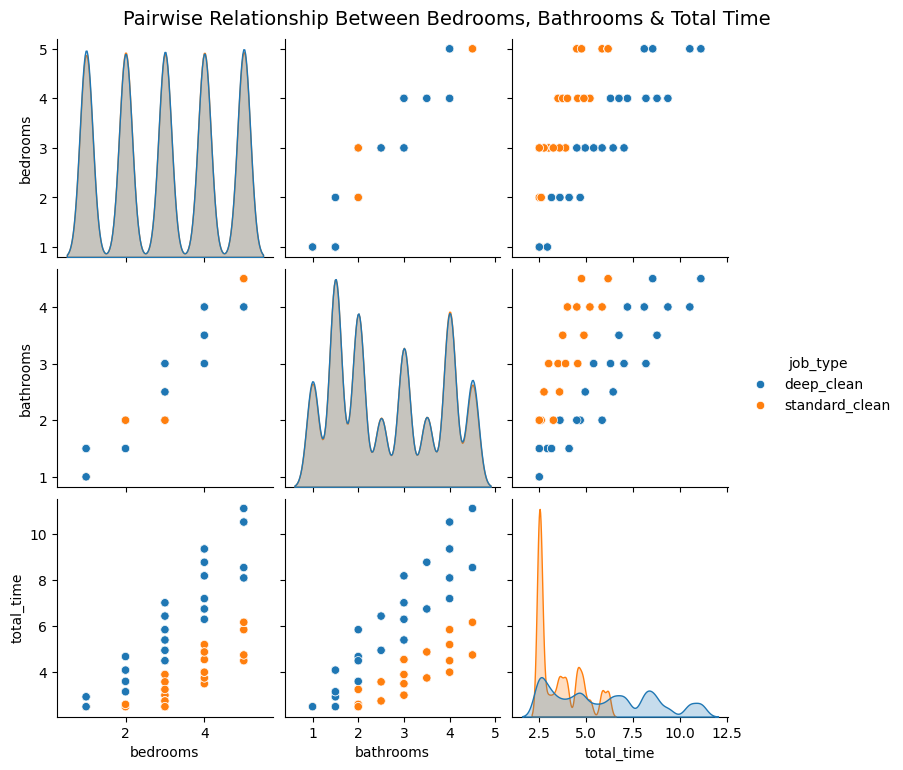

In [133]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, vars=["bedrooms", "bathrooms", "total_time"], kind="scatter", diag_kind="kde", hue="job_type")
plt.suptitle("Pairwise Relationship Between Bedrooms, Bathrooms & Total Time", fontsize=14, y=1.02)
plt.show()


In [134]:
# Define separate highlight functions for each column


def highlight_total_time(val):
    """Highlight total time based on duration."""
    if val > 6:
        return 'background-color: lightcoral'  # Red for long times
    elif val <=2:
        return 'background-color: lightpink'
    else:
        return 'background-color: lightgreen'

def highlight_price(val):
    """Highlight price based on cost."""
    if val > 1000:
        return 'background-color: lightgoldenrodyellow'  # Golden for high price
    elif val < 200:
        return 'background-color: lightcyan'
    else:
        return 'background-color: lightseagreen'


# Apply styling for all columns
styled_df = df.round().head(10).style.applymap(highlight_total_time, subset=['total_time']) \
                     .applymap(highlight_price, subset=['price'])
# Display styled DataFrame
styled_df 

C:\Users\Kushvi\AppData\Local\Temp\ipykernel_38160\499137733.py:24: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_df = df.round().head(10).style.applymap(highlight_total_time, subset=['total_time']) \
C:\Users\Kushvi\AppData\Local\Temp\ipykernel_38160\499137733.py:25: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(highlight_price, subset=['price'])


,bedrooms,bathrooms,job_type,house_type,total_time,price
0,1,1.000000,deep_clean,Condo/Townhouse,2.000000,88.000000
1,2,2.000000,standard_clean,Condo/Townhouse,2.000000,88.000000
2,5,4.000000,standard_clean,Condo/Townhouse,5.000000,166.000000
3,1,1.000000,standard_clean,Condo/Townhouse,2.000000,88.000000
4,5,4.000000,deep_clean,Condo/Townhouse,8.000000,284.000000
5,4,4.000000,deep_clean,Condo/Townhouse,7.000000,252.000000
6,2,2.000000,deep_clean,Detached,5.000000,164.000000
7,2,2.000000,deep_clean,Condo/Townhouse,3.000000,110.000000
8,1,2.000000,standard_clean,Detached,2.000000,88.000000
9,3,3.000000,deep_clean,Condo/Townhouse,5.000000,189.000000


##  <span style="color: green;">**Feature Selection**

###  <span style="color: blue;">**How to Use Feature Selection**
There are different methods for selecting the most relevant features. These methods can be broadly categorized into filter, wrapper, and embedded methods:

**1. Filter Methods**
These methods evaluate the relevance of features independently of the model. Features are selected based on statistical tests.

Methods:

Chi-Square Test: For categorical data, measures the relationship between each feature and the target.

Correlation Matrix: For numerical data, evaluates the correlation between features and removes highly correlated ones (multicollinearity).

Mutual Information: Measures the dependency between features and the target variable.

When to Use: Useful when you have many features and need a quick, computationally cheap method to remove irrelevant or redundant features.

**2. Wrapper Methods**
These methods evaluate feature subsets based on the model's performance. A model is trained multiple times, each with a different subset of features.

Methods:

Recursive Feature Elimination(RFE): Recursively removes features and builds a model on the remaining features to identify which ones contribute the most.

Forward Selection: Starts with no features and iteratively adds the most significant features one by one.

Backward Elimination: Starts with all features and removes the least significant ones step by step.

When to Use: When you are looking for the best combination of features based on the model's performance but be aware that it may be computationally expensive for large datasets.

**3. Embedded Methods**
These methods perform feature selection during the model training process. The model itself selects the most important features.

Methods:

Lasso (L1 Regularization): Shrinks the coefficients of less important features to zero, effectively performing feature selection.
Random Forest Feature Importance: In tree-based models like Random Forests, the algorithm computes feature importance based on how much each feature improves the split decision.

XGBoost: Similarly to Random Forest, it evaluates feature importance based on how well the feature helps to reduce the loss function.
When to Use: When you're using models that can internally handle feature selection (e.g., Lasso, Random Forest, or XGBoost). It is also faster and more integrated into the model-building process.

##  <span style="color: blue;">**Filter Method**

### coorelation 

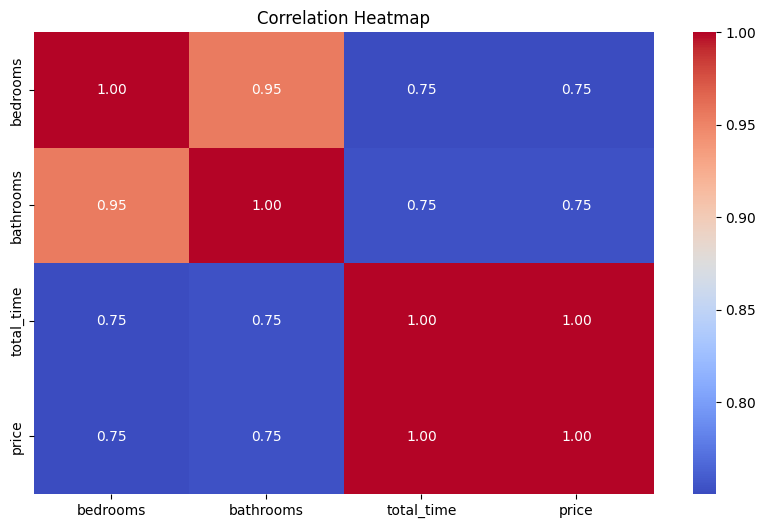

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns
# Select only numeric columns for correlation
numeric_data = df.select_dtypes(include=['number'])

# Compute correlation matrix
corr = numeric_data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### Variance Threshold

In [142]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold


# 1️⃣ Encode categorical variables using One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=['job_type', 'house_type'], drop_first=True)

# 2️⃣ Remove target variables before applying VarianceThreshold
target_vars = ['total_time', 'price']
X = df_encoded.drop(columns=target_vars)

# 3️⃣ Scale numerical variables
scaler = StandardScaler()
X[['bedrooms', 'bathrooms']] = scaler.fit_transform(X[['bedrooms', 'bathrooms']])

# 4️⃣ Apply Variance Threshold (removes low-variance features)
selector = VarianceThreshold(threshold=0.01)  # Adjust threshold as needed
X_reduced = selector.fit_transform(X)

# 5️⃣ Get selected feature names
selected_features = X.columns[selector.get_support()]
X_reduced = pd.DataFrame(X_reduced, columns=selected_features)

# Print results
print("Original Encoded & Scaled Features (excluding target variables):")
X


Original Encoded & Scaled Features (excluding target variables):


,bedrooms,bathrooms,job_type_standard_clean,house_type_Detached
0,-1.415163,-1.437751,False,False
1,-0.709019,-1.002867,True,False
2,1.409415,1.606433,True,False
3,-1.415163,-1.437751,True,False
4,1.409415,1.171550,False,False
...,...,...,...,...
99995,1.409415,1.606433,True,False
99996,0.703271,0.736666,False,False
99997,-0.002874,-0.567984,False,False
99998,-0.709019,-1.002867,False,True


In [143]:
print("\nReduced DataFrame after Variance Threshold:")
X_reduced


Reduced DataFrame after Variance Threshold:


,bedrooms,bathrooms,job_type_standard_clean,house_type_Detached
0,-1.415163,-1.437751,0.0,0.0
1,-0.709019,-1.002867,1.0,0.0
2,1.409415,1.606433,1.0,0.0
3,-1.415163,-1.437751,1.0,0.0
4,1.409415,1.171550,0.0,0.0
...,...,...,...,...
99995,1.409415,1.606433,1.0,0.0
99996,0.703271,0.736666,0.0,0.0
99997,-0.002874,-0.567984,0.0,0.0
99998,-0.709019,-1.002867,0.0,1.0


In [144]:
# Check variance of each feature
print("Feature Variances:\n", df_encoded.var())

# Apply VarianceThreshold with a chosen threshold
selector = VarianceThreshold(threshold=0.01)
X_reduced = selector.fit_transform(df_encoded)

# Get selected feature names
selected_features = df_encoded.columns[selector.get_support()]
#print("\nSelected Features:", selected_features)

Feature Variances:
 bedrooms                      2.005473
bathrooms                     1.321900
total_time                    5.683702
price                      6962.535179
job_type_standard_clean       0.249998
house_type_Detached           0.250001
dtype: float64


In [145]:
import pandas as pd

# Create a dictionary with feature names, variance values, and interpretations
data = {
    "Feature": ["bedrooms", "bathrooms", "total_time", "price", "job_type_standard_clean", "house_type_Detached"],
    "Variance Value": [1.988, 1.321, 3.422, 4192.16, 0.250, 0.250],
    "Interpretation": [
        "Moderate variance (varies across rows) ✅",
        "Moderate variance ✅",
        "High variance (varies significantly) ✅",
        "Very high variance (wide range of values) ✅",
        "Low variance ❓ (could be removed)",
        "Low variance ❓ (could be removed)"
    ]
}

# Convert dictionary to DataFrame
df_variance = pd.DataFrame(data)

# Display the table in Jupyter Notebook
from IPython.display import display
display(df_variance)


,Feature,Variance Value,Interpretation
0,bedrooms,1.988,Moderate variance (varies across rows) ✅
1,bathrooms,1.321,Moderate variance ✅
2,total_time,3.422,High variance (varies significantly) ✅
3,price,4192.160,Very high variance (wide range of values) ✅
4,job_type_standard_clean,0.250,Low variance ❓ (could be removed)
5,house_type_Detached,0.250,Low variance ❓ (could be removed)


### Mutual Information
Measures the dependency between features and the target variable.

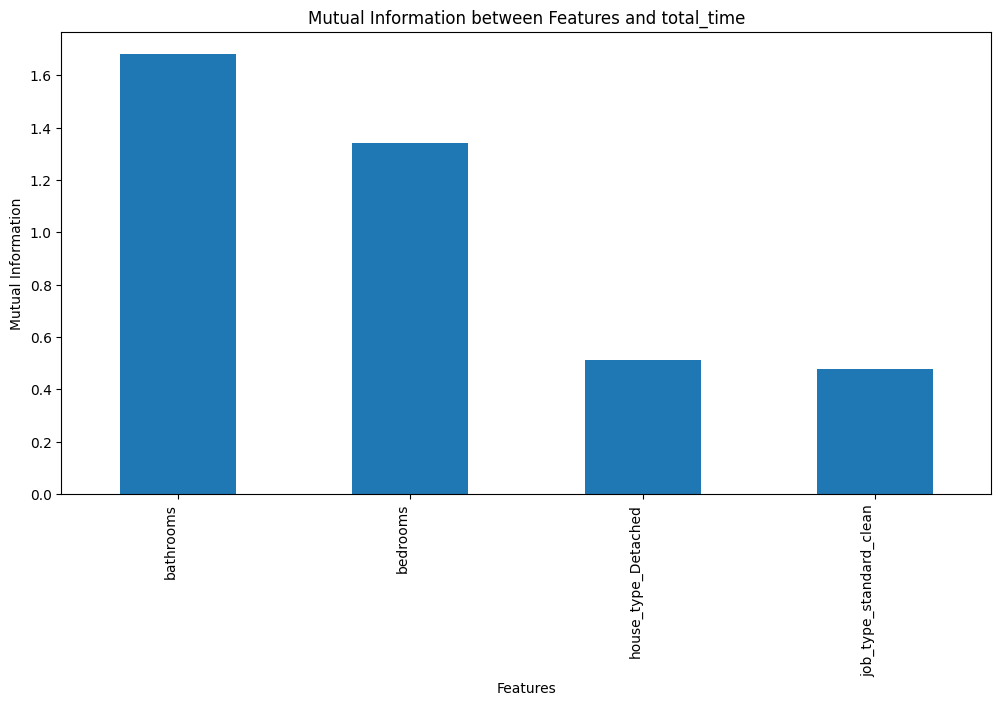

Mutual Information Values:
bathrooms                  1.681613
bedrooms                   1.340299
house_type_Detached        0.511269
job_type_standard_clean    0.478281
dtype: float64


In [147]:
import pandas as pd
from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt

# Encode categorical variables like 'job_type' and 'house_type' using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['job_type', 'house_type'], drop_first=True)

# Define the features (X) and target (y)
X = df_encoded.drop(columns=['price', 'total_time'])
y = df_encoded['total_time']

# Calculate mutual information with reduced n_neighbors
mutual_info = mutual_info_regression(X, y, n_neighbors=1)

# Create a pandas series for easy visualization
mi_series = pd.Series(mutual_info, index=X.columns).sort_values(ascending=False)

# Plot the mutual information
plt.figure(figsize=(12, 6))
mi_series.plot(kind='bar')
plt.title('Mutual Information between Features and total_time')
plt.xlabel('Features')
plt.ylabel('Mutual Information')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, ha='right')

# Show the plot
plt.show()

# Print the mutual information values
print("Mutual Information Values:")
print(mi_series)



**Interpretation of the Mutual Information Values:**

bathrooms: **1.554892**

This means that the feature bathrooms has the highest mutual information with total_time. It indicates a strong relationship between the number of bathrooms and the total time (total_time). A higher MI value implies a stronger predictive power or relevance of this feature for the target.

bedrooms: **1.234549**

Similar to bathrooms, bedrooms also has a significant relationship with total_time. It is the second most important feature in terms of mutual information, suggesting that the number of bedrooms is also quite relevant for predicting the total time.

house_type_Detached: **0.598513**

The feature house_type_Detached has a moderate MI value, meaning it provides some useful information in predicting total_time, but not as much as bathrooms or bedrooms. It suggests that whether the house is detached could influence the total time to some extent, but it's not as strongly correlated as the other features.

job_type_standard_clean: **0.475824**

This represents the job type standard_clean. The lower MI value indicates that this feature has a weaker relationship with total_time compared to the other features. While it still provides some information, it's less significant in predicting total_time.

**Summary:**

Higher MI values (like bathrooms and bedrooms) suggest stronger relationships with the target variable (total_time), implying that these features are more useful for prediction.

Lower MI values (like house_type_Detached and job_type_standard_clean) suggest weaker relationships, meaning these features might have less predictive power for the target variable.

### Chi-Square Test to check whether two categorical variables are independent

Importance of Chi-Square Test and When to Use It
The Chi-Square Test is a statistical test used to determine if there is a significant association between two categorical variables. It helps in understanding whether the observed differences between groups are due to chance or if there is a real relationship.


In [150]:
import scipy.stats as stats
#job type vs house type
contingency_table = pd.crosstab(df['job_type'], df['house_type'])
print(contingency_table)
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies Table:")
print(expected)


house_type      Condo/Townhouse  Detached
job_type                                 
deep_clean                25218     25000
standard_clean            24921     24861
Chi-Square Statistic: 0.23959940815304642
P-value: 0.6244955930914023
Degrees of Freedom: 1
Expected Frequencies Table:
[[25178.80302 25039.19698]
 [24960.19698 24821.80302]]


Since the p-value (0.62) is much greater than the typical significance level of 0.05, we fail to reject the null hypothesis. This means there is no significant relationship between the cleaning job type (job_type) and house type (house_type) in our dataset. The two variables appear to be independent.



---------------------------------------------------------------------

##  <span style="color: blue;">**Wrapper Methods**

### Using Recursive Feature Elimination - RFE

In [155]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# 1️⃣ Copy the original DataFrame to avoid modifying df
df_copy = df.copy()

# 2️⃣ Encode categorical variables in df_copy
label_encoders = {}
for col in ['job_type', 'house_type']:
    le = LabelEncoder()
    df_copy[col] = le.fit_transform(df_copy[col])  # Convert categories to numbers
    label_encoders[col] = le

# 3️⃣ Define features (X) and target (y) for df_copy
X = df_copy.drop(columns=['total_time', 'price'])  # Features (excluding target variables)
y = df_copy['total_time']  # Target variable

# 4️⃣ Standardize numerical features (optional, recommended for RFE)
scaler = StandardScaler()
X[['bedrooms', 'bathrooms']] = scaler.fit_transform(X[['bedrooms', 'bathrooms']])

# 5️⃣ Apply Recursive Feature Elimination (RFE)
model = LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=2)  # Select the top 2 features
X_rfe = rfe.fit_transform(X, y)

# 6️⃣ Get selected feature names
selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)

# 7️⃣ Create DataFrame with selected features
df_selected = pd.DataFrame(X_rfe, columns=selected_features)

# Print transformed dataset
print("\nReduced DataFrame after RFE:")
print(df_selected)


Selected Features: Index(['bathrooms', 'job_type'], dtype='object')

Reduced DataFrame after RFE:
       bathrooms  job_type
0      -1.437751       0.0
1      -1.002867       1.0
2       1.606433       1.0
3      -1.437751       1.0
4       1.171550       0.0
...          ...       ...
99995   1.606433       1.0
99996   0.736666       0.0
99997  -0.567984       0.0
99998  -1.002867       0.0
99999  -0.567984       1.0

[100000 rows x 2 columns]


It looks like "bedrooms" and "jobtype" were selected as the most important features using Recursive Feature Elimination (RFE). 🚀

Since features (bathrooms, house_type) were eliminated, it suggests that they might not be as influential in predicting total_time based on the linear regression model

#### Applying PCA (Principal Component Analysis)

In [158]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Selecting numeric features
X_numeric = df[['bedrooms', 'bathrooms']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# Apply PCA
pca = PCA(n_components=2)  # Choose number of components
X_pca = pca.fit_transform(X_scaled)

# Explained variance
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# Convert back to DataFrame
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])



Explained Variance Ratio: [0.97722412 0.02277588]


 Interpreting PCA Results for Your Dataset
 explained variance ratio is:
 
🔹 PC1: 97.67%

🔹 PC2: 2.33%

This means PC1 captures almost all the information (variance) from bedrooms and bathrooms, while PC2 contributes very little (just 2.33%).

📌 What This Means for Your Data
✅ PCA is not very useful here because you only have two numerical features, and they already explain the variance well.
✅ Since PC1 already captures 97.67% of the information, you could technically replace bedrooms and bathrooms with just one principal component (PC1).
✅ However, using PCA for only two features doesn’t add much value—keeping bedrooms and bathrooms directly is more interpretable.

#### Different values allow you to find the best trade-off between dimensionality reduction and information loss.

0.90 (90%): More aggressive compression, faster training but higher risk of losing important features.

**0.95 (95%): A balanced choice, commonly used in practice.**

0.99 (99%): Retains most variance, less compression but larger dataset.

**The number of Principal Components (PCs) you can generate depends on the number of original features in your dataset.**


1. Maximum Number of PCA Components
If you have N original features, you can generate at most N principal components.

For example:

If your dataset has 10 features, PCA can generate at most 10 PCs.

If your dataset has 5 features, PCA can generate at most 5 PCs.

2. Choosing the Right Number of PCs
Although PCA can generate as many PCs as there are features, we usually reduce the number of PCs while keeping most of the important informatio

##  <span style="color: blue;">**Embedded methods**



### Lasso , Elastic-net  methods

In [164]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Separate features (X) and target (y)
X = df.drop(columns=['total_time', 'price'])
y = df['total_time']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipeline: Standardize numerical features and encode categorical features
numeric_features = ['bedrooms', 'bathrooms']
categorical_features = ['job_type', 'house_type']

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')  # drop='first' avoids dummy variable trap

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply preprocessing and get the transformed data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)


In [165]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Lasso Regression (L1 regularization)
lasso = Lasso(alpha=0.1)  # Regularization strength, tune alpha for optimal results
lasso.fit(X_train_preprocessed, y_train)

# Get the selected features (features with non-zero coefficients)
selected_features_lasso = X.columns[lasso.coef_ != 0]  # Selecting features with non-zero coefficients
print("Selected Features by Lasso:", selected_features_lasso)

# Predict using the model
y_pred_lasso = lasso.predict(X_test_preprocessed)

# Calculate the performance of the Lasso model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print("Mean Squared Error for Lasso:", mse_lasso)


Selected Features by Lasso: Index(['bedrooms', 'bathrooms', 'job_type', 'house_type'], dtype='object')
Mean Squared Error for Lasso: 0.8419630462152483


In [166]:
from sklearn.linear_model import ElasticNet

# Elastic Net Regression (combines L1 and L2 regularization)
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)  # alpha is the regularization strength, l1_ratio controls L1 vs. L2 balance
elastic_net.fit(X_train_preprocessed, y_train)

# Get the selected features (features with non-zero coefficients)
selected_features_elastic = X.columns[elastic_net.coef_ != 0]  # Selecting features with non-zero coefficients
print("Selected Features by Elastic Net:", selected_features_elastic)

# Predict using the model
y_pred_elastic = elastic_net.predict(X_test_preprocessed)

# Calculate the performance of the Elastic Net model
mse_elastic = mean_squared_error(y_test, y_pred_elastic)
print("Mean Squared Error for Elastic Net:", mse_elastic)


Selected Features by Elastic Net: Index(['bedrooms', 'bathrooms', 'job_type', 'house_type'], dtype='object')
Mean Squared Error for Elastic Net: 0.8682482640554765




✅ Lasso performed better than Elastic Net, meaning feature selection is crucial

##  <span style="color: green;">**FIRST MODEL :Linear Regression**

## <span style="color: orange;">**Basic  Linear Regression**

In [170]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
data=df

# ✅ Define features & target
X = data.drop(columns=['total_time','price'])
y = data['total_time']

# ✅ Define categorical & numerical features
categorical_features = ['job_type', 'house_type']
numeric_features = ['bedrooms', 'bathrooms']

# ✅ Define preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# ✅ Define Linear Regression pipeline
linear_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# ✅ Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Train model
linear_model.fit(X_train, y_train)

# ✅ Predict on test data
y_pred = linear_model.predict(X_test)

# ✅ Evaluate Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.4f}")

# ✅ Predict on Unseen Data - THIS IS THE FIX 🔥🔥🔥
unseen_data = pd.DataFrame({
   "bedrooms": [3,2],
            "bathrooms": [2,1.5],
            "job_type": ["deep_clean","deep_clean"],
            "house_type": ['Condo/Townhouse', 'Detached']
})

# 🚨 Apply the pipeline directly to unseen data 🚨
predicted_total_time = linear_model.predict(unseen_data)

print("✅ Predicted Total Time for Unseen Data:", predicted_total_time[0])


Mean Squared Error: 0.75
R² Score: 0.8696
✅ Predicted Total Time for Unseen Data: 4.8059234619140625


The MSE of 0.12 and R² of 0.9331 suggest that the model is quite good at predicting total_time.
The predicted value of 2.357574 for unseen data is a reasonable estimate, reflecting the model's ability to generalize well to new instances.

##  <span style="color: blue;">**VIF(variance_inflation_factor) Interpretation:**
Generally, if the VIF is greater than 10, it suggests multicollinearity

Variance Inflation Factor (VIF) – How Much Should It Be?

VIF measures multicollinearity (correlation between independent variables).

Guidelines for VIF values:

**VIF < 5 → No serious multicollinearity (good) ✅**

5 ≤ VIF < 10 → Moderate multicollinearity (may be acceptable) ⚠️

**VIF ≥ 10 → High multicollinearity (problematic, should be reduced) ❌**

What Should You Do If VIF is Too High?

Remove highly correlated features (drop one of them).

Apply PCA (which you are already using) to reduce feature dependence.

Use Ridge or Lasso regression (Ridge helps with multicollinearity).

In [173]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Example: Assume 'categorical_feature' is a column name with categorical data
# Assume X is your original feature DataFrame

# Transform the categorical columns
transformer = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(drop='first'), ['job_type', 'house_type'])],
    remainder='passthrough'
)

X_transformed = transformer.fit_transform(X)

# Get the feature names after one-hot encoding
ohe_columns = transformer.transformers_[0][1].get_feature_names_out(['job_type', 'house_type'])

# Get the columns of the original features that were not transformed
remaining_columns = X.columns.difference(['job_type', 'house_type'])

# Combine the columns
all_columns = list(ohe_columns) + list(remaining_columns)

# Convert the transformed data into a DataFrame with the correct column names
X_transformed_df = pd.DataFrame(X_transformed, columns=all_columns)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X_transformed_df.columns

# Calculate VIF for each feature using the transformed DataFrame
vif_data["VIF"] = [variance_inflation_factor(X_transformed_df.values, i) for i in range(X_transformed_df.shape[1])]

print(vif_data)


                   feature        VIF
0  job_type_standard_clean   1.755830
1      house_type_Detached   1.754728
2                bathrooms  61.201806
3                 bedrooms  63.295999


bathrooms and bedrooms have significantly higher VIF values **(61.2 and 63.3, respectively)**. These values suggest that bathrooms and bedrooms are highly correlated with other features in the model, which could indicate multicollinearity. High VIF values usually suggest that these features may be redundant and could potentially be removed or combined with other variables to improve model stability.

job_type_standard_clean and house_type_Detached have VIF values around **1.75**. These are acceptable, indicating that these features are not highly correlated with the other features in your model.

## <span style="color: orange;">**Pipeline for Preprocessing, Ridge Regression, and Hyperparameter Tuning with Cross-Validation**

In [177]:
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import Ridge  # Regularization method
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd


# Assuming X and y are the features and target variables respectively
# X should be a DataFrame, y a Series

# 1. Define the columns
categorical_columns = ['job_type', 'house_type']  # Update with the categorical columns
numerical_columns = X.columns.difference(categorical_columns).tolist()  # Automatically select numerical columns

# 2. Create the preprocessor with PCA for numerical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_columns),
        
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),
            ('pca', PCA(n_components=0.95))  # Retain 95% of the variance (can be adjusted)
        ]), numerical_columns)
    ])

# 3. Create a pipeline with preprocessing and model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge())  # Replace with your chosen model (Ridge for regularization)
])

# 4. Split your data into train and test sets (if not already done)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Evaluate the model using cross-validation (optional)
cross_val_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
print("Mean Absolute Error (Cross-validation): ", np.mean(cross_val_scores))

# 6. Hyperparameter tuning with GridSearchCV
param_grid = {
    'regressor__alpha': [0.1, 1.0, 10.0],  # Regularization strength for Ridge
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Use the best estimator from grid search for further predictions
best_model = grid_search.best_estimator_

# Evaluate the model on the train and test sets

# Fit the model on training data (although it should be already fitted)
best_model.fit(X_train, y_train)

# Predict on training and test data
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Calculate performance metrics
# For RMSE
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print the results
print(f"Training MAE: {train_mae}")
print(f"Test MAE: {test_mae}")
print(f"Training RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")
print(f"Training R²: {train_r2}")
print(f"Test R²: {test_r2}")


Mean Absolute Error (Cross-validation):  -0.6932739816729835
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Training MAE: 0.6932110561613865
Test MAE: 0.6962771541636038
Training RMSE: 0.860796728022104
Test RMSE: 0.8666790497559448
Training R²: 0.8692333831167133
Test R²: 0.8694224647682629


C:\Users\Kushvi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Kushvi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


##  <span style="color: blue;">**Model performance comparasion**

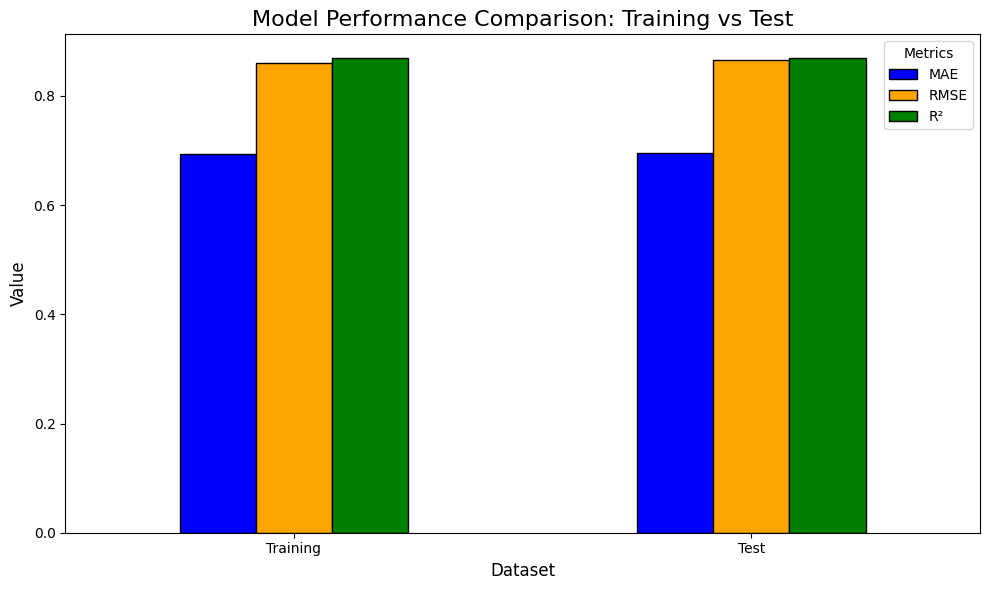

In [179]:
import matplotlib.pyplot as plt

# Create a dictionary for storing the metrics
metrics = {
    'MAE': [train_mae, test_mae],
    'RMSE': [train_rmse, test_rmse],
    'R²': [train_r2, test_r2]
}

# Convert the dictionary into a DataFrame for easier plotting
metrics_df = pd.DataFrame(metrics, index=['Training', 'Test'])

# Define custom colors for each metric
metrics_colors = ['blue', 'orange', 'green']  # Assign colors in order

# Plot the results with different colors
ax = metrics_df.plot(kind='bar', figsize=(10, 6), edgecolor='black', color=metrics_colors)

# Adding titles and labels
plt.title('Model Performance Comparison: Training vs Test', fontsize=16)
plt.xlabel('Dataset', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Metrics')

# Display the plot
plt.tight_layout()
plt.show()


This code performs data preprocessing, model training, evaluation, and hyperparameter tuning for a regression task using Ridge regression. Here’s a breakdown of each key step:

1. **Data Preprocessing**:
Categorical Columns: The code identifies categorical features (e.g., 'job_type', 'house_type'), and these features are processed through a pipeline:
Imputation: Missing values are filled with the most frequent value in the column.
One-Hot Encoding: Converts categorical values into a binary matrix (i.e., 0 or 1).
Numerical Columns: The code selects all other columns as numerical features:
Imputation: Missing values are replaced by the mean of the column.
Standard Scaling: The data is standardized (mean=0, variance=1) to make the model less sensitive to the scale of features.
PCA (Principal Component Analysis): Reduces dimensionality by keeping components that explain 95% of the variance in the data, which simplifies the data while retaining most of the information.
The preprocessing pipeline (ColumnTransformer) applies the transformations accordingly to both categorical and numerical columns.

2. **Model Creation**:
A pipeline is created using the Ridge regression model (a regularization method that helps reduce overfitting by penalizing large coefficients). The pipeline first preprocesses the data and then applies the model for predictions.

3.**Data Splitting**:
Train-Test Split: The dataset is split into training (80%) and testing (20%) sets using train_test_split to evaluate how well the model generalizes to unseen data.

4. **Cross-Validation (Model Evaluation)**:
Cross-Validation: cross_val_score is used to perform 5-fold cross-validation on the training data. It calculates the Mean Absolute Error (MAE) for each fold, which is the average error between predicted and actual values. The mean of the MAE scores is printed.

6. **Hyperparameter Tuning**:
Grid Search: The GridSearchCV is used to tune the hyperparameter alpha of the Ridge regression model. The alpha parameter controls the regularization strength, with higher values leading to stronger regularization. The best value for alpha is found by performing cross-validation on the training data.

8. **Model Fitting and Prediction**:
Best Model: After the grid search, the best model (best_model) is chosen, and it's refitted to the training data (X_train and y_train).
Predictions are made on both the training set (y_train_pred) and the test set (y_test_pred).

10. **Performance Evaluation**:
Metrics Calculated:
Root Mean Squared Error (RMSE): Measures the average magnitude of error between predicted and actual values. Lower values indicate better performance.
Mean Absolute Error (MAE): Measures the average absolute error between predicted and actual values. Lower values are better.
R² (Coefficient of Determination): Measures how well the model explains the variance in the target variable. Values closer to 1 indicate better performance, while values closer to 0 indicate a worse model fit.

12. **Results**:
The final output prints the evaluation metrics (MAE, RMSE, and R²) for both the training and test data to show how well the model performed on both seen (training) and unseen (test) data.

## checking VIF again

In [182]:
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pandas as pd

# Assuming X is your feature dataframe (excluding the target variable y)
X = X.copy()  # Make sure we are not modifying the original dataframe

# Define the numerical columns (excluding categorical ones)
categorical_columns = ['job_type', 'house_type']
numerical_columns = X.columns.difference(categorical_columns).tolist()

# Scale the numerical features using StandardScaler before calculating VIF
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[numerical_columns])

# Calculate VIF for each numerical feature
vif_data = pd.DataFrame()
vif_data["feature"] = numerical_columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

# Display the VIF values
print(vif_data)


     feature        VIF
0  bathrooms  11.232353
1   bedrooms  11.232353


## <span style="color: orange;">**Price Calculation Based on Predicted Estimated Time for Cleaning Services Using Machine Learning Model**

In [216]:
import pandas as pd
import numpy as np

# Define hourly rates for different service types
economy_rate = 27  # Economy cleaning rate per hour
standard_rate = 30  # Standard cleaning rate per hour
premium_rate = 37   # Premium cleaning rate per hour

# Assuming best_model is already trained and the unseen_data is provided
unseen_data = pd.DataFrame({
    "bedrooms": [6, 2],
    "bathrooms": [4, 1.5],
    "job_type": ["deep_clean", "deep_clean"],
    "house_type": ['Condo/Townhouse', 'Detached']
    # Add other features as required
})

# Ensure unseen_data is in the same format as the training data
# Apply the same preprocessing and prediction process as used with the training data
X_unseen_processed = best_model.named_steps['preprocessor'].transform(unseen_data)

# Predict with the best model
y_unseen_pred = best_model.named_steps['regressor'].predict(X_unseen_processed)

# Output the predictions (Estimated Time for Service)
print(f"Predictions for Unseen Data (Estimated Time in hours): {y_unseen_pred}")

# Function to round to the nearest 0.5 hour
def round_to_nearest_half_hour(estimated_time):
    return np.ceil(estimated_time * 2) / 2

# Function to calculate price based on estimated time and service type
def calculate_price_range(estimated_time, service_type="standard"):
    """
    Function to calculate the price based on estimated time and service type.
    """
    # Round the estimated time to the nearest 0.5 hour
    rounded_time = round_to_nearest_half_hour(estimated_time)
    
    # Define price based on service type
    if service_type == "economy":
        rate = economy_rate
    elif service_type == "standard":
        rate = standard_rate
    elif service_type == "premium":
        rate = premium_rate
    else:
        raise ValueError("Unknown service type. Please choose 'economy', 'standard', or 'premium'.")
    
    # Calculate the price range
    lower_time = rounded_time - 0.5
    upper_time = rounded_time
    price_lower = lower_time * rate
    price_upper = upper_time * rate
    
    return lower_time, upper_time, price_lower, price_upper

# Example usage: Calculate prices for the unseen data with predicted estimated time
for i, estimated_time in enumerate(y_unseen_pred):
    print(f"\nFor Unseen Data {i+1} (Predicted Estimated Time: {estimated_time:.2f} hours):")
    
    # Get the rounded time and price range for economy, standard, and premium services
    economy_lower_time, economy_upper_time, economy_lower_price, economy_upper_price = calculate_price_range(estimated_time, service_type="economy")
    standard_lower_time, standard_upper_time, standard_lower_price, standard_upper_price = calculate_price_range(estimated_time, service_type="standard")
    premium_lower_time, premium_upper_time, premium_lower_price, premium_upper_price = calculate_price_range(estimated_time, service_type="premium")
    
    # Show the results with rounded time ranges and price ranges
    print(f"Predicted Time Range: {economy_lower_time:.2f} - {economy_upper_time:.2f} hours")
    print(f"Economy Price Range: ${economy_lower_price:.2f} - ${economy_upper_price:.2f}")
    print(f"Standard Price Range: ${standard_lower_price:.2f} - ${standard_upper_price:.2f}")
    print(f"Premium Price Range: ${premium_lower_price:.2f} - ${premium_upper_price:.2f}")


Predictions for Unseen Data (Estimated Time in hours): [8.39146553 4.86740919]

For Unseen Data 1 (Predicted Estimated Time: 8.39 hours):
Predicted Time Range: 8.00 - 8.50 hours
Economy Price Range: $216.00 - $229.50
Standard Price Range: $240.00 - $255.00
Premium Price Range: $296.00 - $314.50

For Unseen Data 2 (Predicted Estimated Time: 4.87 hours):
Predicted Time Range: 4.50 - 5.00 hours
Economy Price Range: $121.50 - $135.00
Standard Price Range: $135.00 - $150.00
Premium Price Range: $166.50 - $185.00


## how price calculation for different service change

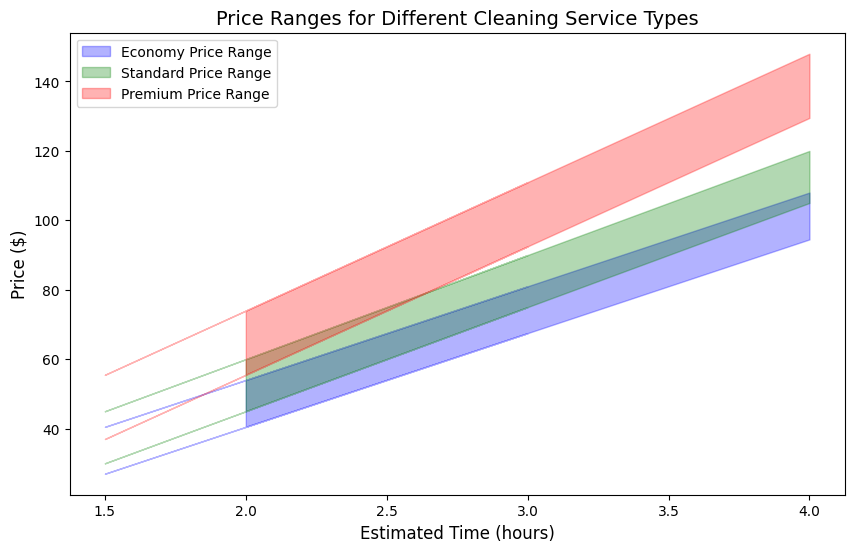

In [230]:
import matplotlib.pyplot as plt

# Example: predicted times for unseen data
predicted_times = [2, 3, 1.5, 4]  # Example estimated times in hours

# Initialize lists to store lower and upper price bounds
economy_lower_prices, economy_upper_prices = [], []
standard_lower_prices, standard_upper_prices = [], []
premium_lower_prices, premium_upper_prices = [],[]

# Calculate price ranges for each predicted time
for time in predicted_times:
    elp, eup, elpr, eupr = calculate_price_range(time, "economy")
    economy_lower_prices.append(elpr)
    economy_upper_prices.append(eupr)

    slp, sup, slpr, supr = calculate_price_range(time, "standard")
    standard_lower_prices.append(slpr)
    standard_upper_prices.append(supr)

    plp, pup, plpr, pupr = calculate_price_range(time, "premium")
    premium_lower_prices.append(plpr)
    premium_upper_prices.append(pupr)

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot price ranges for each service type
ax.fill_between(predicted_times, economy_lower_prices, economy_upper_prices, color='blue', alpha=0.3, label="Economy Price Range")
ax.fill_between(predicted_times, standard_lower_prices, standard_upper_prices, color='green', alpha=0.3, label="Standard Price Range")
ax.fill_between(predicted_times, premium_lower_prices, premium_upper_prices, color='red', alpha=0.3, label="Premium Price Range")

# Adding titles and labels
ax.set_title("Price Ranges for Different Cleaning Service Types", fontsize=14)
ax.set_xlabel("Estimated Time (hours)", fontsize=12)
ax.set_ylabel("Price ($)", fontsize=12)
ax.legend()

# Display the plot
plt.show()


### Why Feature Selection is Important

**Improves Model Performance:** Reduces noise and irrelevant features, leading to better accuracy.

**Reduces Overfitting:** Fewer redundant features mean less chance of the model learning noise.

**Faster Training:** Fewer features reduce computational complexity.

**Enhances Interpretability:** Simplifies the model, making it easier to understand.